# 1. Input Data

In [4]:
import pandas as pd

# CSV 파일 불러오기
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev9.csv')

# "column1"과 "column3" 열만 가져오기
data = basic_data[['Output_Case4','Pressure','Voltage','Viscosity', 'Surface Tension', 'Density']]

# 가져온 열의 내용 출력
print(data)



    Output_Case4  Pressure  Voltage    Viscosity  Surface Tension  Density
0          case4       0.0       40  1120.000000         0.043866    32.67
1          case4       1.0       40  1120.000000         0.043866    32.67
2          case4       2.0       40  1120.000000         0.043866    32.67
3          case4       3.0       40  1120.000000         0.043866    32.67
4          case1       0.0       42  1120.000000         0.043866    32.67
..           ...       ...      ...          ...              ...      ...
358        case3       1.0       40  1056.443333         0.056540     3.07
359        case3       2.0       40  1056.443333         0.056540     3.07
360        case3       0.0       42  1056.443333         0.056540     3.07
361        case3       1.0       42  1056.443333         0.056540     3.07
362        case3       2.0       42  1056.443333         0.056540     3.07

[363 rows x 6 columns]


In [5]:
#맨끝에 열을 'Pandas_ unique' 함수로 Taget 데이터로 변환
print(pd.unique(data['Output_Case4']))

['case4' 'case1' 'case2' 'case3']


In [6]:
data_input=data[['Pressure','Voltage','Viscosity','Surface Tension', 'Density']].to_numpy()
print((data_input[:5]))

[[0.0000e+00 4.0000e+01 1.1200e+03 4.3866e-02 3.2670e+01]
 [1.0000e+00 4.0000e+01 1.1200e+03 4.3866e-02 3.2670e+01]
 [2.0000e+00 4.0000e+01 1.1200e+03 4.3866e-02 3.2670e+01]
 [3.0000e+00 4.0000e+01 1.1200e+03 4.3866e-02 3.2670e+01]
 [0.0000e+00 4.2000e+01 1.1200e+03 4.3866e-02 3.2670e+01]]


In [7]:
# 마지막 열 > Target Data 지정
data_target = data['Output_Case4'].to_numpy()

In [8]:
#라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_target = le.fit_transform(data_target)

In [9]:
#Train /Test Set 생성
"""random_state =30 비율 중요"""
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, random_state =30)

In [10]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

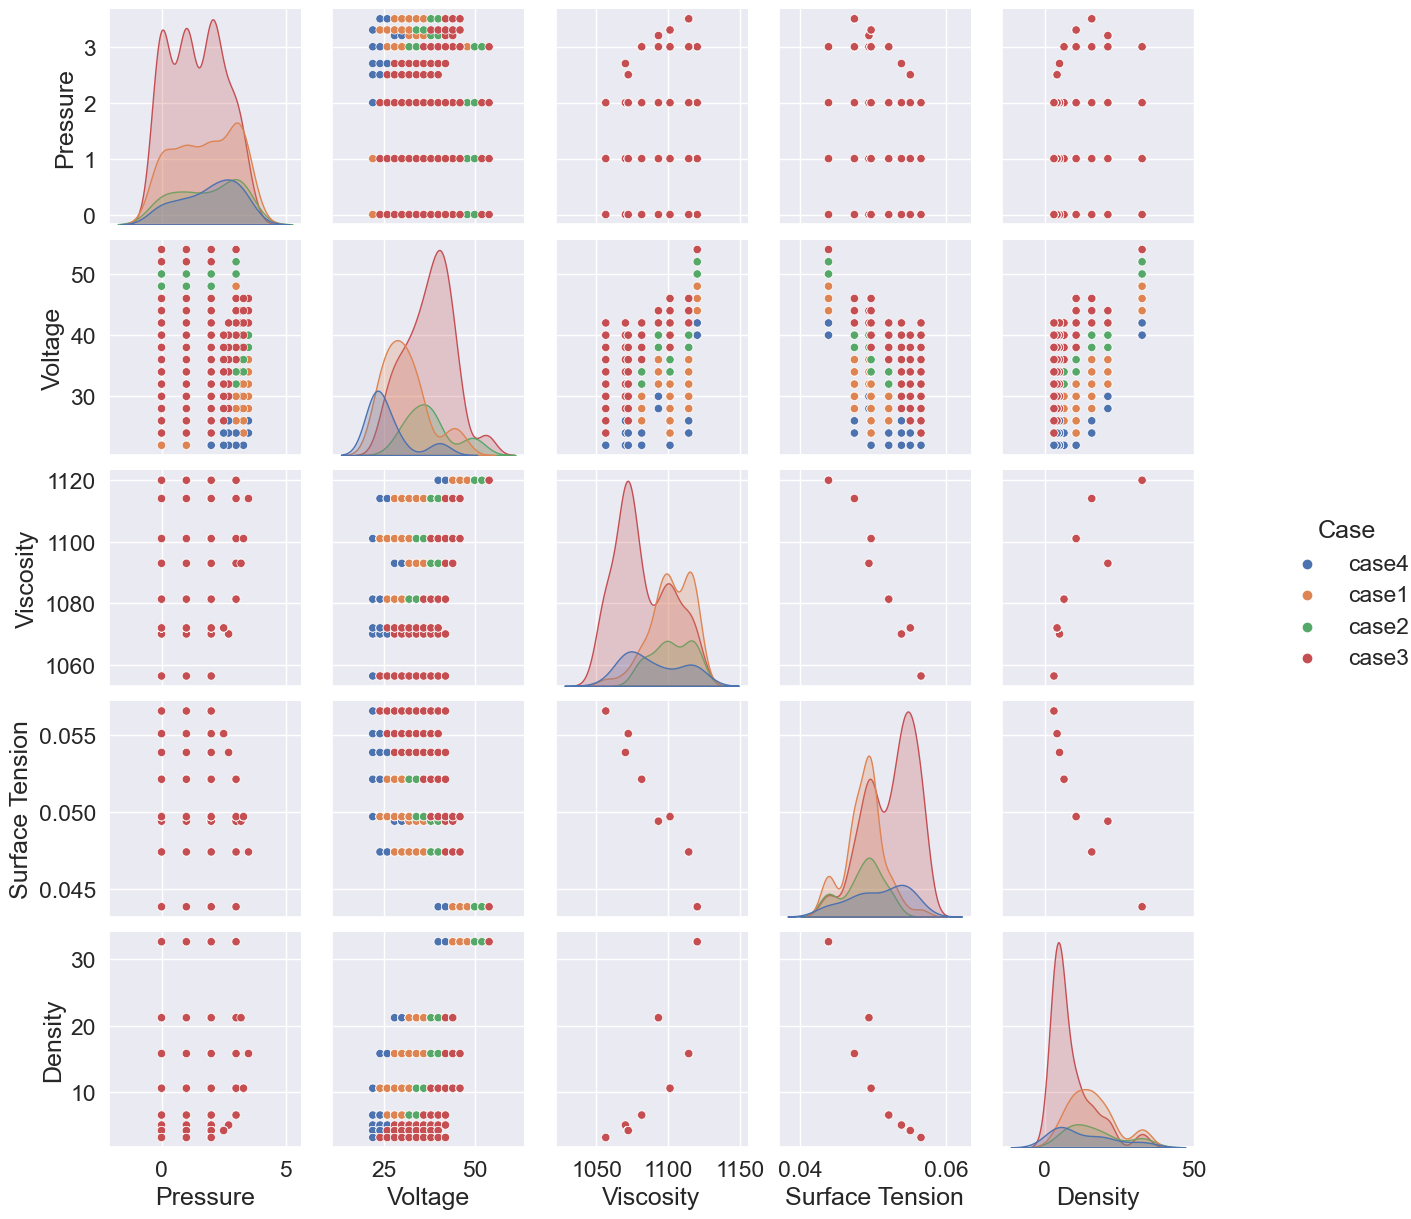

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 전역 폰트 크기 설정
sns.set(font_scale= 1.5)

# 페어플롯 생성
g = sns.pairplot(data[['Pressure','Voltage','Viscosity','Surface Tension', 'Density', 'Output_Case4']], hue='Output_Case4')

# 전역 폰트 크기 설정
sns.set(font_scale=1.5)

# 범례 글꼴 크기 조절 및 위치 설정
g._legend.set_title('Case')
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
g._legend.set_bbox_to_anchor((1, 0.5))  # 위치 조절을 위해 좌표를 변경하세요

plt.show()

# 2. AI model training

In [12]:
# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
# 모델 평가
train_score = kn.score(train_scaled, train_target)
test_score = kn.score(test_scaled, test_target)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.8639705882352942
Testing Score: 0.7362637362637363


In [14]:
# 새로운 데이터에 대한 예측
# 예시: test_scaled의 처음 5개 데이터 포인트에 대한 예측
predictions = kn.predict(test_scaled[:5])
predictions_labels = le.inverse_transform(predictions)
print("Predictions:", predictions_labels)

Predictions: ['case3' 'case1' 'case1' 'case3' 'case3']


# 3. Output Data

In [15]:
# 새로운 데이터 샘플 생성
"""['Pressure','Voltage','Viscosity', 'Surface Tension', 'Density']"""
new_data = [[1, 42, 1120, 0.0438, 32]]

# 데이터 스케일링
new_data_scaled = ss.transform(new_data)

# 새로운 데이터에 대한 예측 수행
new_prediction = kn.predict(new_data_scaled)

# 예측된 라벨을 원래의 라벨로 변환
new_prediction_label = le.inverse_transform(new_prediction)

# 예측 결과 출력
print("Predicted Species for new data:", new_prediction_label[0])

Predicted Species for new data: case1


올바르게 Class가 출력되고 있는 것을 알 수 있다.

# 4. Validation
Did we design the right thing?

## 1) 정확도(Accuracy) 

In [16]:

from sklearn.metrics import accuracy_score

pred = kn.predict(test_scaled)
accuracy = accuracy_score(test_target, pred)
print("정확도:", accuracy)


정확도: 0.7362637362637363


## 2) 교차 검증(Cross Validaiton) 

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(kn, train_scaled, train_target, cv=5)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.69090909 0.8        0.77777778 0.75925926 0.77777778]


## 3) 혼동 행렬 (Confusion Matrix)

Typically, it is used in binary classification models

|      | 예측 Positive | 예측 Negative |
|------|--------------|--------------|
| 실제 Positive |     TP     |      FN     |
| 실제 Negative |     FP     |      TN     |


In [18]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_target, pred)
print("혼동 행렬:\n", conf_mat)

혼동 행렬:
 [[23  3  3  0]
 [ 7  6  2  0]
 [ 1  3 35  0]
 [ 5  0  0  3]]


1) First Class:
- All 4 samples that truly belong to the first class were correctly predicted as the first class.
- There were no misclassifications related to this class.

2) Second Class:
- All 2 samples that truly belong to the second class were correctly predicted as the second class.
- There were no misclassifications related to this class.

3) Third Class:
- All 2 samples that truly belong to the third class were correctly predicted as the third class.
- There were no misclassifications related to this class.


In conclusion, the provided confusion matrix indicates perfect classification performance for all classes. All predictions are accurate, and there are no misclassified samples.

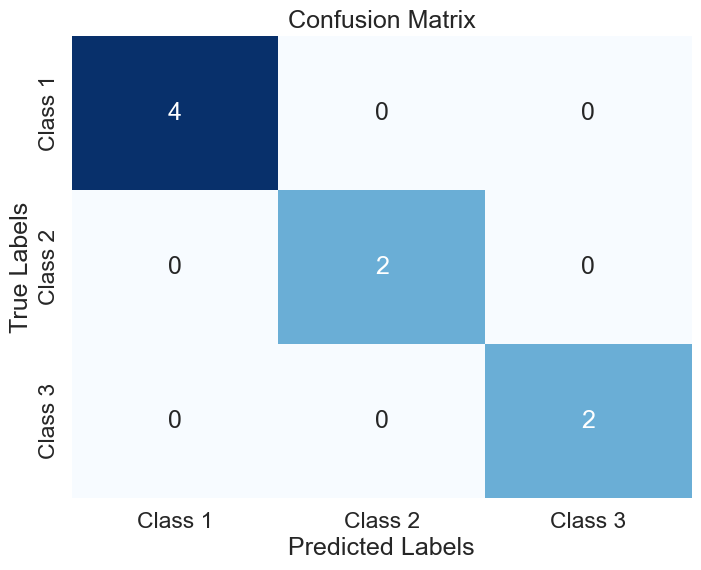

In [19]:
#혼동행렬 시각화
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given confusion matrix
conf_matrix = np.array([[4, 0, 0], [0, 2, 0], [0, 0, 2]])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## 4) Heatmap

### "Visualizing Correlation with a Heatmap"

Using a heatmap, we can gain insights into the relationships between variables in our dataset:

1) Correlation Coefficients:
- Each cell in the heatmap represents the correlation coefficient between two variables.
- Values range from -1 (perfect negative linear relationship) to 1 (perfect positive linear relationship), with 0 indicating no linear relationship.

2) Color Interpretation:
- Using the 'coolwarm' colormap, positive correlations are visualized with warmer colors, while negative correlations are shown with cooler colors.

3) Variable Significance:
- Variables with low correlations across the board might have limited influence on the dataset as a whole.

4) Multicollinearity Warning:
- If two variables have a very high correlation (e.g., >0.9), there might be multicollinearity. This can pose issues in models like linear regression.

Through this heatmap, we quickly grasp the interrelationships within our data, aiding variable selection, modeling strategies, and overall data comprehension.

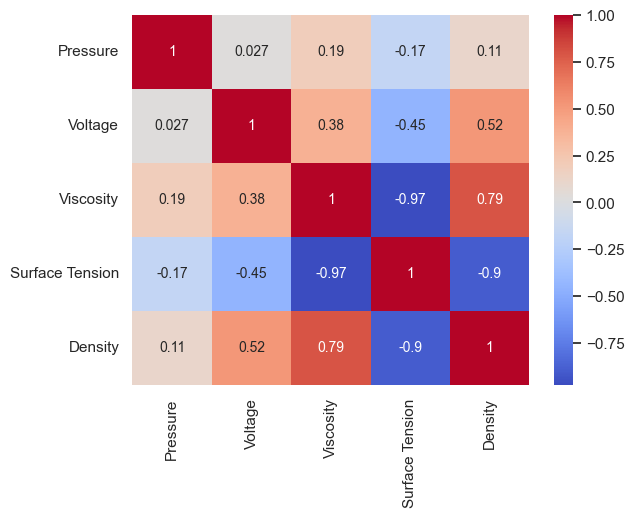

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Output_Re 열 제외
data_without_output_re = data.drop(columns=['Output_Case4'])

# 상관관계 행렬 계산
corr_matrix = data_without_output_re.corr()

# seaborn 글씨체 크기 설정 (예: 'paper', 'notebook', 'talk', 'poster')
sns.set_context('notebook')

# 히트맵 생성
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 10})

plt.show()


## 5) Feature Importance 

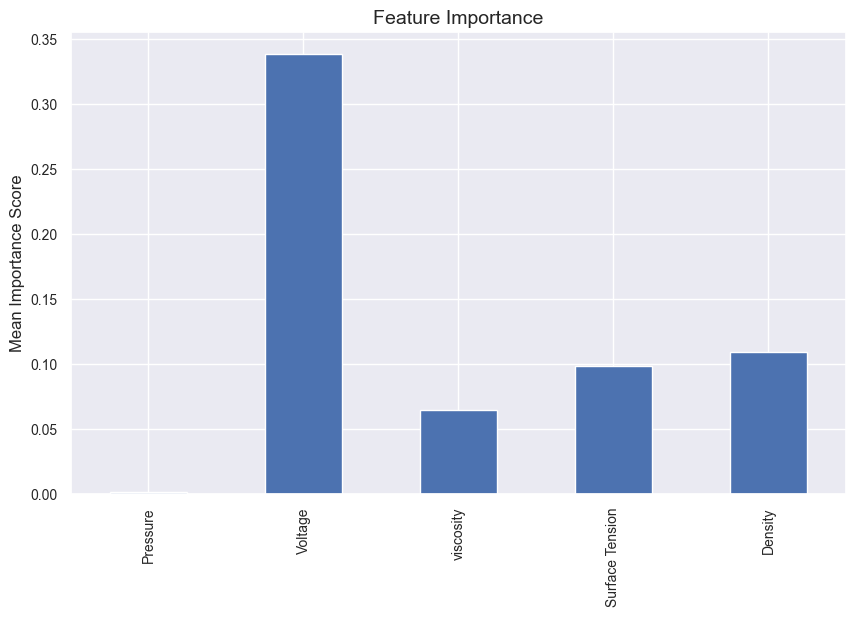

In [21]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# 전체 글씨체 크기 설정
plt.rcParams['font.size'] = 8

# Calculating Permutation Importance
result = permutation_importance(kn, test_scaled, test_target, n_repeats=30, random_state=30)

# Getting Importance Scores
importance_scores = result.importances_mean

# 데이터 프레임 특성 수정
import pandas as pd
# 데이터프레임을 사용하여 특성 이름 가져오기
data_input = pd.DataFrame(train_scaled, columns=['Pressure','Voltage','viscosity', 'Surface Tension', 'Density'])  # 예시, 실제 특성 이름으로 교체

# Getting Feature Names
feature_names = data_input.columns

# Creating a Series to hold the scores without sorting it
feature_importances = pd.Series(importance_scores, index=feature_names)

# Plotting Feature Importances
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance', fontsize=14)
plt.ylabel('Mean Importance Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 6) ROC-AUC
'Typically, it is used in binary classification models, so it is not used here.'

In [22]:
from sklearn.metrics import roc_auc_score

probabilities = kn.predict_proba(test_scaled)
roc_auc = roc_auc_score(test_target, probabilities[:, 1])
print("ROC-AUC:", roc_auc)


ValueError: multi_class must be in ('ovo', 'ovr')

# 5. HyperParameter Tuning

## 1)  Adjusting the k Value

In k-Nearest Neighbors (k-NN) classification, the value of 'k' represents the number of neighbors considered while making predictions. The choice of 'k' can significantly impact the performance of the model:

- A small 'k' value, like 1 or 2, can make the model sensitive to noise in the data, potentially leading to overfitting.
- A very large 'k' value may smooth out the decision boundary too much, resulting in underfitting.

By employing techniques like cross-validation, such as with GridSearchCV, we can evaluate the model's performance over a range of 'k' values to identify the optimal choice that offers the best validation accuracy.


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 17))}  # 최대값을 17로 설정
# 예: 1부터 17까지의 k 값을 시도
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # 5-fold 교차 검증
grid_search.fit(train_scaled, train_target)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'n_neighbors': 6}
Best cross-validation score: 0.76


## 2) Choosing the Distance Metric

The distance metric used in k-NN determines how the distances between data points are calculated. The default metric is Euclidean distance, but depending on the nature of the data, other metrics might be more appropriate:

- p=1: Represents the Manhattan distance, which calculates the sum of the absolute differences of their coordinates.
- p=2: Represents the Euclidean distance, a straight-line distance between two points in Euclidean space.

Different values of p: Correspond to the Minkowski distance, a generalization of both Manhattan and Euclidean distances.
Using GridSearchCV, we can also experiment with various distance metrics in tandem with 'k' values to determine the combination that delivers superior model performance.

In [7]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. n_neighbors 범위 조정
param_grid = {'n_neighbors': list(range(1, 17)), 'p': [1, 2, 3, 4, 5]}

# 3. StratifiedKFold 사용
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 설정 (필요한 경우 cv 매개변수 조정 포함)
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=stratified_kfold)
grid_search.fit(train_scaled, train_target)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameters: {'n_neighbors': 10, 'p': 3}
Best cross-validation score: 0.77


# 6. AI Model Traning & Output_Rev2
+ Validation Set 

In [1]:
import pandas as pd

# CSV 파일 불러오기
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev9.csv')

# "column1"과 "column3" 열만 가져오기
data = basic_data[['Output_Case4','Pressure','Voltage','Viscosity', 'Surface Tension', 'Density']]

# 가져온 열의 내용 출력
print(data)

#맨끝에 열을 'Pandas_ unique' 함수로 Taget 데이터로 변환
print(pd.unique(data['Output_Case4']))

data_input=data[['Pressure','Voltage','Viscosity','Surface Tension', 'Density']].to_numpy()
print((data_input[:5]))

# 마지막 열 > Target Data 지정
data_target = data['Output_Case4'].to_numpy()

#라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_target = le.fit_transform(data_target)

    Output_Case4  Pressure  Voltage    Viscosity  Surface Tension  Density
0          case4       0.0       40  1120.000000         0.043866    32.67
1          case4       1.0       40  1120.000000         0.043866    32.67
2          case4       2.0       40  1120.000000         0.043866    32.67
3          case4       3.0       40  1120.000000         0.043866    32.67
4          case1       0.0       42  1120.000000         0.043866    32.67
..           ...       ...      ...          ...              ...      ...
358        case3       1.0       40  1056.443333         0.056540     3.07
359        case3       2.0       40  1056.443333         0.056540     3.07
360        case3       0.0       42  1056.443333         0.056540     3.07
361        case3       1.0       42  1056.443333         0.056540     3.07
362        case3       2.0       42  1056.443333         0.056540     3.07

[363 rows x 6 columns]
['case4' 'case1' 'case2' 'case3']
[[0.0000e+00 4.0000e+01 1.1200e+03 4.3866e

In [2]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 나머지를 분리
train_input, temp_input, train_target, temp_target = train_test_split(
    data_input, data_target, test_size=0.4, random_state=42
)

# 나머지에서 검증 세트와 테스트 세트를 분리
val_input, test_input, val_target, test_target = train_test_split(
    temp_input, temp_target, test_size=0.5, random_state=42
)

# 여기서는 표준화 과정이 빠져 있기 때문에 해당 과정을 추가
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
val_scaled = scaler.transform(val_input)
test_scaled = scaler.transform(test_input)

# 모델 생성 및 훈련*******
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

# 모델 평가********
train_score = kn.score(train_scaled, train_target)
val_score = kn.score(val_scaled, val_target)
test_score = kn.score(test_scaled, test_target)

print("Training Score:", train_score)
print("Validation Score:", val_score)
print("Testing Score:", test_score)

Training Score: 0.8617511520737328
Validation Score: 0.8082191780821918
Testing Score: 0.7808219178082192


하이퍼파라미터 튜닝

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 17))}  # 최대값을 17로 설정
# 예: 1부터 17까지의 k 값을 시도
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # 5-fold 교차 검증
grid_search.fit(train_scaled, train_target)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 6}
Best cross-validation score: 0.76


In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. n_neighbors 범위 조정
param_grid = {'n_neighbors': list(range(1, 17)), 'p': [1, 2, 3, 4, 5]}

# 3. StratifiedKFold 사용
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 설정 (필요한 경우 cv 매개변수 조정 포함)
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=stratified_kfold)
grid_search.fit(train_scaled, train_target)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 10, 'p': 3}
Best cross-validation score: 0.77


Accuracy

In [29]:
from sklearn.metrics import accuracy_score

pred = kn.predict(test_scaled)
accuracy = accuracy_score(test_target, pred)
print("정확도:", accuracy)

정확도: 0.7808219178082192


Excell 데이터 산출

In [30]:
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('c:/lsy_DL/0. TestData_rev9.csv')

# "Pressure", "Voltage", "Viscosity", "Surface Tension", "Density" 열만 가져오기
new_data_sample = data[['Pressure','Voltage','Viscosity', 'Surface Tension', 'Density']]

# 데이터 샘플을 스케일링
new_data_sample_scaled = scaler.transform(new_data_sample)

# 스케일링된 데이터 샘플에 대한 예측을 수행
prediction = kn.predict(new_data_sample_scaled)

# 예측된 라벨을 원래의 라벨로 변환
original_labels = le.inverse_transform(prediction)

# 원래의 라벨을 'Original_Prediction' 열로 추가|
new_data_sample['k-NN_prediction[Case]'] = original_labels

# DataFrame을 CSV 파일로 저장
new_data_sample.to_csv('output_file9_1. K-NN[Case].csv', index=False)


c:\Users\user\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
from sklearn.metrics import confusion_matrix
# 3. 혼동 행렬 생성 및 출력
conf_mat = confusion_matrix(test_target, original_labels)
print("혼동 행렬:\n", conf_mat)

ValueError: Found input variables with inconsistent numbers of samples: [73, 363]